# Assignment 4


## Instructions

Please complete this Jupyter notebook and then convert it to a `.py` file called `assignment4.py`. Upload this file to Gradescope, and await feedback. 

For manual grading, you will need to upload additional files to separate Gradescope portals.

You may submit as many times as you want up until the deadline. Only your latest submission counts toward your grade.

Some tests are hidden and some are visible. The outcome of the visible checks will be displayed to you immediately after you submit to Gradescope. The hidden test outcomes will be revealed after final scores are published. 

This means that an important part of any strategy is to **start early** and **lock in all the visible test points**. After that, brainstorm what the hidden checks could be and collaborate with your teammates.


### Problem 1: Dirichlet-Multinomial

If $y = (y_1, \ldots, y_k)$ is a length $k$ count vector (e.g. $(1,3,4,0,2)$ and $k=5$), we could let it have a multinomial distribution. 
$$
L(y \mid \theta) \propto \prod_{i=1}^k \theta_i^{y_i}
$$

We could also put a $\text{Dirichlet}(\alpha_1, \ldots, \alpha_k)$ prior on the unknown $\theta$:
$$
\pi(\theta) = \text{Dirichlet}(\alpha_1, \ldots, \alpha_k) \propto \prod_{i=1}^k \theta_i^{\alpha_i - 1}.
$$

In lecture we showed that the resulting posterior is 
$$
\theta \mid y \sim \text{Dirichlet}(\alpha_1 + y_1, \ldots, \alpha_k + y_k)
$$

Now suppose that we have the same prior, but we have $N > 1$ observed vectors. Derive the posterior in this situation. Show all your work!

Hint: it is customary to let the row index correspond to the observation number; i.e.

$$
y = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}
=
\begin{bmatrix}
y_{1,1} & y_{1,2} & \cdots & y_{1,k} \\
\vdots  & \vdots & \ddots & \vdots \\
y_{N,1} & y_{N,2} & \cdots & y_{N,k} \\
\end{bmatrix}
$$

Hint 2: we assume each row/observation is independent and identically distributed, so

$$
L(y_1, \ldots, y_N \mid \theta) = \prod_{r=1}^N L(y_r \mid \theta) 
$$

### Problem 2: Roulette!



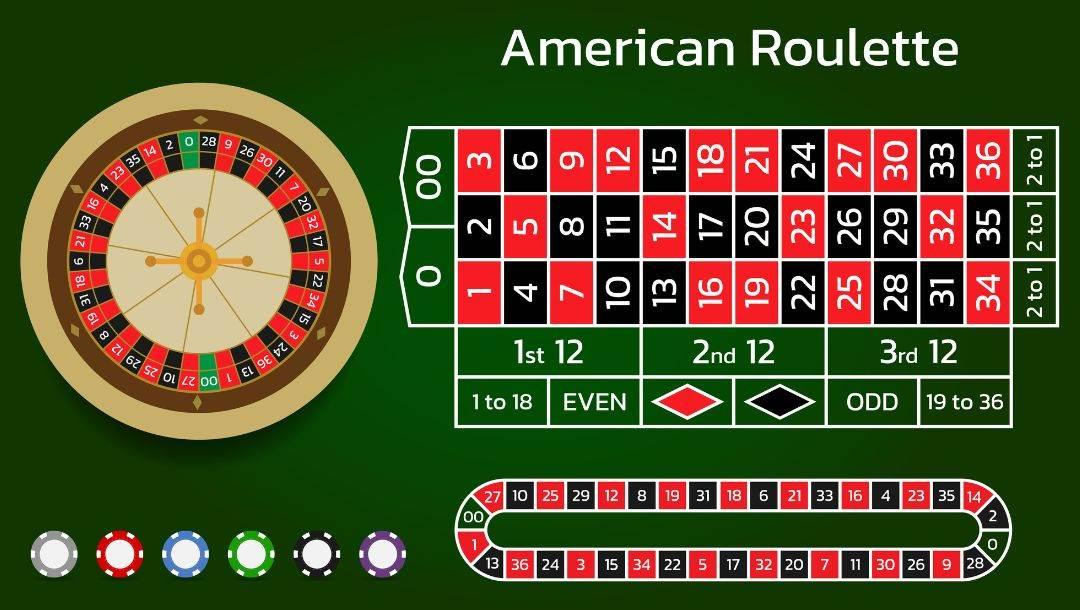





In the game of (American) Roulette, you guess where the ball will land after the wheel is spun. If all spaces are equally-likely, the house has an advantage no matter what you do. However, if you can spot a "bias" in the wheel, you might have an advantage!

In this example, the parameter $\theta = (\theta_1, \ldots, \theta_{36}, \theta_{37}, \theta_{38})$ represents the probabilities of each of the 38 possible ball-landing locations. $\theta_{37}$, $\theta_{38}$ will represent the "0" and "00" outcomes, respectively.

Suppose you have a $\text{Dirichlet}(\alpha_1, \ldots, \alpha_{38})$ prior:
$$
\pi(\theta) \propto \prod_{j=1}^{38} \theta_j^{\alpha_j-1}.
$$

And you have $N$ vector-valued observations--one vector of counts for each day. We can use a **multinomial** likelihood for this data:
$$
L(y \mid \theta) = \prod_{i=1}^{100} L(y_i \mid \theta),
$$

where
$$
L(y_i \mid \theta) \propto \prod_{j=1}^{38} \theta_j^{y_{ij}}
$$

1.

Pick a prior by specifying the hyperparameters $\alpha_1, \ldots, \alpha_{38}$. Assign a Numpy array to the variable named `prior_hyperparams`

In [3]:
import numpy as np
import pandas as pd

In [22]:
prior_hyperparams = np.repeat(2, 38)
prior_hyperparams

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

2. 

Consider the following (fake) data set `my_data` below. Construct the observation vectors. This data array should have day on the rows, and location on the columns. As a result, your final answer should have shape `(100,38)`

For example, the day three row vector consists of the 38 count integers:

$$
y_3 = \begin{bmatrix}\text{(num 1s on day 3)}, & \cdots ,& \text{(num 38s on day 3)} \end{bmatrix}
$$

Assign your answer to the numpy array `y_data`.

Hint: `.pivot_table()` is nice for this.

In [4]:
# Define the possible numbers on the roulette wheel
numbers = np.arange(0, 38)  
colors = ['green'] + ['red', 'black'] * 18  + ['green']

# simulate some data
num_days = 100
num_spins_per_day = 100
num_rows = num_days*num_spins_per_day
my_data = pd.DataFrame({'number':np.random.choice(numbers, num_rows)})
my_data['color'] = my_data.number.apply( lambda num : colors[num])
my_data['day'] = np.repeat(np.arange(1,(num_spins_per_day+1)),num_days)
my_data

,number,color,day
0,24,black,1
1,12,black,1
2,26,black,1
3,13,red,1
4,26,black,1
...,...,...,...
9995,19,red,100
9996,16,black,100
9997,10,black,100
9998,9,red,100


In [32]:
y_data = np.array(pd.pivot_table(my_data, index='day', columns='number', aggfunc='size', fill_value=0))
y_data

array([[1, 1, 3, ..., 2, 3, 0],
       [2, 4, 1, ..., 2, 1, 5],
       [0, 2, 1, ..., 5, 6, 4],
       ...,
       [2, 3, 5, ..., 2, 4, 2],
       [1, 5, 3, ..., 2, 3, 4],
       [3, 3, 3, ..., 3, 6, 2]])

In [33]:
y_data.shape

(100, 38)

3.

Calculate the Dirichlet posterior hyperparameters. Assign a 1-d Numpy array to the variable named `post_hyperparams`

In [36]:
y_sums = y_data.sum(axis=0)
y_sums

array([261, 266, 247, 239, 293, 240, 262, 293, 296, 248, 254, 259, 265,
       269, 281, 254, 267, 246, 259, 271, 287, 286, 248, 253, 228, 258,
       270, 296, 252, 265, 283, 250, 284, 238, 241, 279, 256, 256])

In [24]:
post_hyperparams = y_sums + prior_hyperparams
post_hyperparams

array([263, 268, 249, 241, 295, 242, 264, 295, 298, 250, 256, 261, 267,
       271, 283, 256, 269, 248, 261, 273, 289, 288, 250, 255, 230, 260,
       272, 298, 254, 267, 285, 252, 286, 240, 243, 281, 258, 258])

4.

If you can only bet one one number, which number are you picking? Possible answer choices include $1, \ldots, 36,37,38$ where the last two numbers follow the aforementioned convention. 

Assign your answer to `best_bet`

Hint: be careful...Python uses 0-based indexing but Roulette starts counting at $1$.


In [ ]:
best_bet =np.argmax(post_hyperparams) + 1
best_bet

np.int64(9)

5.


If the true model is that every outcome is equally likely, will you make money in the long run?

In other words, suppose that your prior is **super informative,** and simulate from the prior predictive distribution. For each spin of the wheel, calculate your profit (or loss). Use fixed bet sizes.

Visualize your simulated profit and losses appropriately, and justify your answer with these visualizations.

In [140]:
#from scipy.stats import dirichlet
#thetas = np.repeat((1/38), 38)
#prior_param_samples = dirichlet.rvs(prior_hyperparams)

In [141]:
#from scipy.stats import multinomial
#prior_predic_samps = []
#num_sims = 100
#for i in prior_param_samples:
#    prior_predic_samps.append(np.random.multinomial(n=num_sims, p=thetas, size=1)[0])
#prior_predic_samps = np.array(prior_predic_samps).flatten()

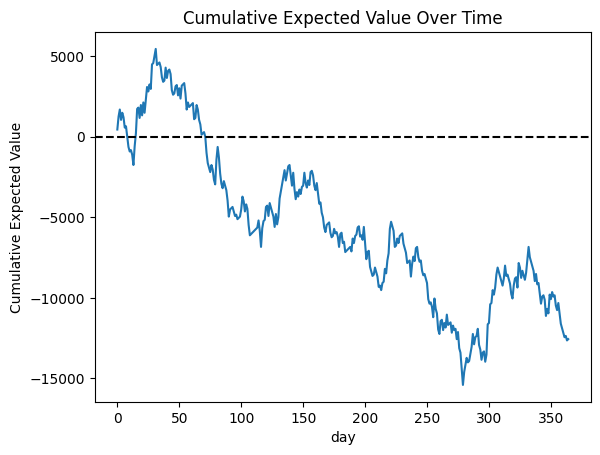

In [258]:
from scipy.stats import multinomial

thetas = np.repeat((1/38), 38)
games = 100
days = 365
samps = [multinomial.rvs(n=games, p=thetas) for _ in range(days)]
samps = pd.DataFrame(samps)

bet = 10
losses = (games - samps[8])* bet
wins = samps[8] * bet * 35
expected_value = (wins - losses) 

import matplotlib.pyplot as plt

plt.plot(np.cumsum(expected_value))
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('day')
plt.ylabel('Cumulative Expected Value')
plt.title('Cumulative Expected Value Over Time')
plt.show()

In [254]:
def roulette_sim(days, games, bet):
    thetas = np.repeat((1/38), 38)
    samps = [multinomial.rvs(n=games, p=thetas) for _ in range(days)]
    samps = pd.DataFrame(samps)

    losses = (games - samps[8])* bet
    wins = samps[8] * bet * 35
    expected_value = (wins - losses)
    return expected_value.sum()

-4938.4


(array([2., 0., 2., 0., 1., 3., 4., 5., 4., 8., 6., 9., 6., 5., 3., 7., 6.,
        5., 3., 3., 5., 2., 3., 2., 2., 3., 0., 0., 0., 1.]),
 array([-18280., -17308., -16336., -15364., -14392., -13420., -12448.,
        -11476., -10504.,  -9532.,  -8560.,  -7588.,  -6616.,  -5644.,
         -4672.,  -3700.,  -2728.,  -1756.,   -784.,    188.,   1160.,
          2132.,   3104.,   4076.,   5048.,   6020.,   6992.,   7964.,
          8936.,   9908.,  10880.]),
 <BarContainer object of 30 artists>)

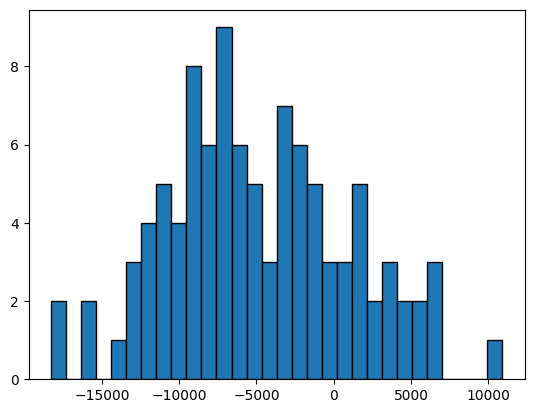

In [262]:
multiple_sims = [roulette_sim(100, 100, 10) for _ in range(100)]
print(np.mean(multiple_sims))

plt.hist(multiple_sims, bins=30, edgecolor='black')

### Problem 3: Stocks

In example 2 of module 4, we showed that if one has multivariate normal observations, then the **Normal Inverse Wishart** prior is the conjugate prior.

In this example, we'll be using stocks data again, but with a **daily sampling frequency.**

1.

Download the data `stocks.csv` and assign it to a `pandas` `DataFrame` called `adj_prices`. Be sure to set the date as the index.

Calculate percent returns (scaled by $100$) and call the resulting `DataFrame` `rets`. After understanding where they come from, be sure to remove any `NaN`s.

In [41]:
adj_prices = pd.read_csv('stocks.csv', index_col='Date')
adj_prices

,SPY,QQQ
Date,,
2020-01-02,304.113556,210.605392
2020-01-03,301.810730,208.676270
2020-01-06,302.962158,210.020767
2020-01-07,302.110260,209.991577
2020-01-08,303.720428,211.569916
...,...,...
2023-12-22,472.182892,407.626312
2023-12-26,474.176697,410.121704
2023-12-27,475.034058,410.956604


In [43]:
rets = adj_prices.pct_change().dropna()*100
rets

,SPY,QQQ
Date,,
2020-01-03,-0.757226,-0.915989
2020-01-06,0.381507,0.644298
2020-01-07,-0.281190,-0.013899
2020-01-08,0.532974,0.751620
2020-01-09,0.678064,0.847351
...,...,...
2023-12-22,0.200965,0.149597
2023-12-26,0.422253,0.612176
2023-12-27,0.180810,0.203574


2.

Write a function called `sim_data` that can simulate from either the prior predictive or the posterior predictive distribution.

Here's a template based on how I did it. You may use all of it or just some of it. However, do be sure to keep the same function signature :) Every input or output is either a `float` or a 2-d Numpy array.

In [44]:
from scipy.stats import invwishart
from scipy.stats import multivariate_normal

def sim_data(nu0, Lambda0, mu0, kappa0, num_sims):
    pi_Sigma = invwishart(df = nu0, scale = Lambda0)
    sigma_samples = pi_Sigma.rvs(num_sims)
    mu_samples = np.array(
        [multivariate_normal(
            mean = mu0, 
            cov = Sigma/kappa0).rvs(1) for Sigma in sigma_samples])
    theta_samples = zip(mu_samples, sigma_samples)
    fake_y = np.array(
        [multivariate_normal(
            mean = mu, 
            cov = Sigma).rvs(1) for (mu,Sigma) in theta_samples])
    return fake_y

3.

Pick a prior by assigning specific values to `nu0`, `Lambda0`, `mu0` and `kappa0`. Use your `sim_data()` function to choose wisely.

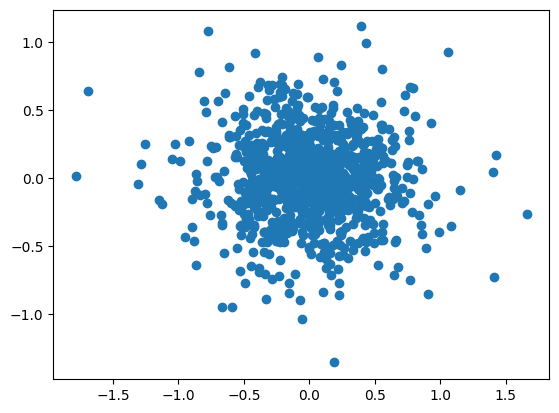

In [48]:
nu0 = 10
Lambda0 = np.array([[1/2,0],[0,1/3]])
mu0 = np.array([0,0])
kappa0 = 1
num_sims = 1000
fake_y = sim_data(nu0, Lambda0, mu0, kappa0, num_sims)
plt.scatter(fake_y[:,0], fake_y[:,1])

4.

Calculate the posterior NIW distribution. Assign the distribution's hyperparameters to `nu_n`, `kappa_n`, `mu_n`, and `Lambda_n`

In [51]:
n =len(rets)
nu_n = nu0 + n
kappa_n = kappa0 + n
ybar = rets.mean().values
ybar_minus_mu0 = (ybar - mu0).reshape(2,1)
mu_n = mu0*kappa0/(kappa0 + n) + ybar*n/(kappa0 + n)
S = (rets.transpose() @ rets).values
Lambda_n = (Lambda0 + S + 
            ybar_minus_mu0 @ ybar_minus_mu0.transpose() 
            * kappa0*n/(kappa0+n))

In [53]:
post_Sigma = invwishart(df = nu_n, scale = Lambda_n)
sigma_samples = post_Sigma.rvs(num_sims)
mu_samples = np.array(
    [multivariate_normal(
        mean = mu_n, 
        cov = Sigma/kappa_n).rvs(1) for Sigma in sigma_samples])
theta_samples = zip(mu_samples, sigma_samples)
y_tilde = np.array(
    [multivariate_normal(
        mean = mu, 
        cov = Sigma).rvs(1) for (mu,Sigma) in theta_samples])

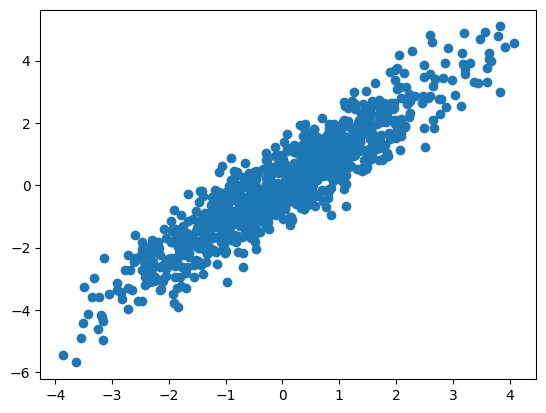

In [54]:
plt.scatter(y_tilde[:,0], y_tilde[:,1])

5.

Simulate $1239$ observations from the posterior predictive distribution. You can use `sim_data()` for this, too. Assign your array to the variable `post_pred_sims`



Does this model fit lower-frequency stock returns better? Discuss.



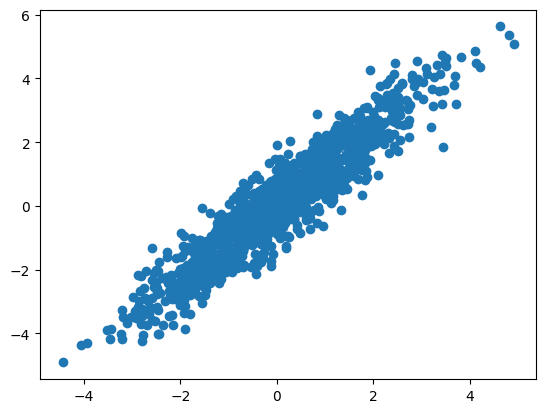

In [55]:
# uncomment after you have a working implementation of sim_data()!
post_pred_sims = sim_data(nu_n, Lambda_n, mu_n, kappa_n, 1239)
#post_pred_sims = ...
plt.scatter(post_pred_sims[:,0], post_pred_sims[:,1])

6. 

Now that you have a posterior for $\mu$ and $\Sigma$, that means you have an understanding of the distribution of future returns. Let's find the "optimal" portfolio weights! 


Portfolio weights $w = w_1, \ldots, w_k$ are proportions of your wealth that you invest in each security. We want to find the vector that that **maximizes "risk-adjusted return"**

$$
\underbrace{\mathbf{w}^\intercal \mathbb{E}_{\text{posterior}}[y]}_{\text{reward}} - \frac{1}{2} \gamma \underbrace{\mathbf{w}^\intercal \mathbb{V}_{\text{posterior}}[y] \mathbf{w}}_{\text{risk}}
$$ 

subject to the constraint that you have a finite amount of money:

$$
\sum_i w_i = 1
$$

$\gamma > 0$ is a user-chosen risk-aversion parameter. Describe your choice of it, and run the function below to get your optimal portfolio weights. Discuss your results. Some examples of questions to consider are:

 - Do my weights indeed sum to $1$?
 - What are some problems with choosing $\gamma$ very close to $0$?
 - What are some problems with choosing $\gamma$ very large?
 - What do I think most peoples' $\gamma$ are?
 - Knowing what I know now, would I go back and change around the prior to get a posterior that gives me a better answer here? 

In [86]:
def get_weights(nu_n, Lambda_n, mu_n, kappa_n, gamma, s = 1):
    k = len(mu_n)
    post_mean = mu_n
    post_var = Lambda_n / (nu_n - k - 1)*(1 + 1/kappa_n)
    V_inv = np.linalg.inv(post_var)
    ones = np.repeat(1, k)
    q1 = ones.transpose() @ V_inv @ post_mean
    q2 = ones.transpose() @ V_inv @ ones
    le_fraction = (q1 - gamma*s)/q2
    return V_inv @ (post_mean - le_fraction * ones) / gamma
    
best_weights = get_weights(nu_n, Lambda_n, mu_n, kappa_n, gamma=0.005, s = 1)
#best_weights = ...
best_weights

array([-10.92431018,  11.92431018])